In [1]:
import Maps
import numpy as np
from matplotlib.pyplot import *

In [2]:
reload(Maps)

<module 'Maps' from 'Maps.pyc'>

# 作业部分

## 第一章

### 3

按照题意首先实例化一个HenonMap，然后取出去掉暂态后前1000步的结果，为了方便绘图将结果转换成Numpy的ndarray。

In [3]:
henon = Maps.HenonMap(1.4, 0.3, [0, 0])
series = henon.boundedSeries(1000)
series = np.asarray(series)

将图描绘出来。

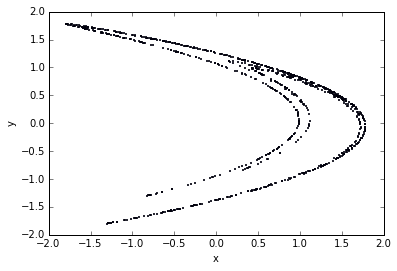

In [4]:
plt.scatter(series[20:,0], series[20:,1],s=1)
gca().set_xlabel("x")
gca().set_ylabel("y")

savefig("./pics/h1-3-1.pdf")

### 4

根据题意实例化一个 LogisticMap，先取一个特定的r值，看看时间序列。

In [63]:
logistic = Maps.LogisticMap(2.8, 0.5)

In [66]:
series = logistic.boundedSeries(300)

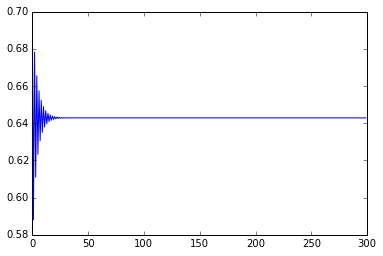

In [67]:
plot(series)

可以看出系统一开始震荡的比较厉害，到后面有所收敛，下面为了画出分岔图，需要将一开始震荡比较厉害的暂态扔掉，这里暂态大约500步。

In [71]:
result = []
for r in np.linspace(2.5, 4, 250):
    logistic = Maps.LogisticMap(r, 0.45)
    series = logistic.boundedSeries(3000)
    # 注意，这里扔掉了暂态
    for item in series[500:]:
        result.append([r, item])
result = np.asarray(result)

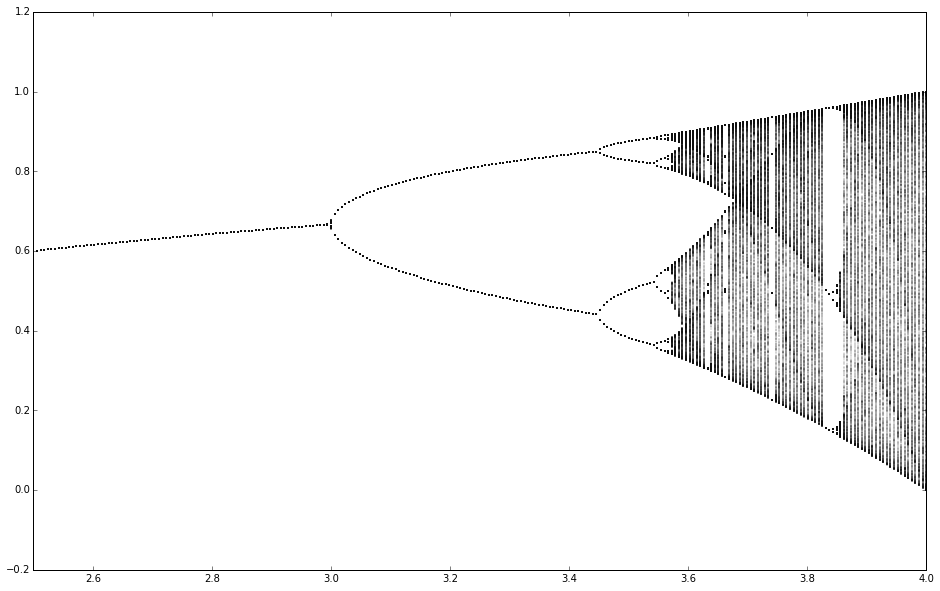

In [72]:
scatter(*result.T, s=0.005)
gcf().set_size_inches(16, 10)
gca().set_xlim([2.5, 4])

savefig("./pics/h1-4-1.png")

### 5

根据题意，分别实例化两个 Logistic 映射，初始状态上只差了0.0005，接着看映射多少次的时候二者的差距已经超过了初始值本身了。

In [78]:
r = 3.8
l1 = Maps.LogisticMap(r, 0.2)
l2 = Maps.LogisticMap(r, 0.2 + 0.00005)
counter = 0
while True:
    a = l1.next()
    b = l2.next()
    if abs(a - b) > 0.2:
        break
    counter += 1
print counter

17


## 第三章

### 22

In [85]:
lambda_a = 1 / 3.
lambda_b = 1 / 3.
alpha = 0.4
init = 1 / math.sqrt(2)

In [86]:
baker = Maps.BakersMap(lambda_a, lambda_b, alpha, [init, init])

In [87]:
series = np.asarray(baker.boundedSeries(1000)[20:])

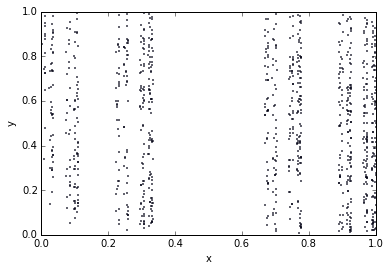

In [95]:
scatter(*series.T, s=0.5)
gca().set_xlabel("x")
gca().set_ylabel("y")
gca().set_xlim([0,1])
gca().set_ylim([0,1])

plt.savefig("./pics/h3-22-1.pdf")

## 第四章

### 9

因为 `Maps.HenonMap` 的类中实现了计算 Lyapunov 指数的方法，可以直接调用，同时得到最大李指数，第二大李指数和 Lyapunov 维数。具体的计算方法可以参考作业中的介绍。

In [236]:
result = []
for b in np.linspace(0.0001, 0.3, 1000):
    henon = Maps.HenonMap(1.4, b, [0, 0])
    h1, h2, ld = henon.lyapunovExponent(vec)
    result.append([b, h1, h2, ld])
result = np.asarray(result)

In [244]:
xs = np.linspace(0, 0.3, 100)
ys = np.zeros(len(xs))

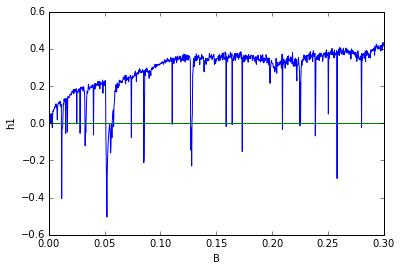

In [254]:
plot(result[:, 0], result[:, 1])
plot(xs, ys)
gca().set_xlabel("B")
gca().set_ylabel("h1")
gca().set_xlim([0, 0.3])
savefig("./pics/h5-9-1.pdf")

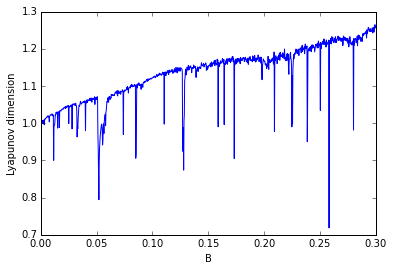

In [255]:
plot(result[:, 0], result[:, 3])
gca().set_xlim([0, 0.3])
gca().set_xlabel("B")
gca().set_ylabel("Lyapunov dimension")
savefig("./pics/h5-9-2.pdf")

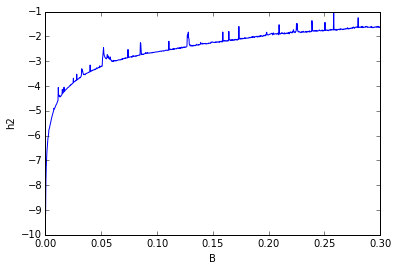

In [256]:
plot(result[:, 0], result[:, 2])
gca().set_xlabel("B")
gca().set_ylabel("h2")
gca().set_xlim([0, 0.3])
savefig("./pics/h5-9-3.pdf")

## 第六章

### 4

Rotaion Number 的计算方法可以参考书中给出的公式，直观的写出来。

In [265]:
ks = [0.4, 0.8, 1.0]

results = []
for k in ks:
    result = []
    for omega in np.linspace(0, 2 * np.pi, 100):
        arn = Maps.ArnoldCircle(k, omega, 0)
        series = arn.boundedSeries(10000)
        result.append([omega, np.mean(np.sin(series)) * k + omega])
    result = np.asarray(result)
    results.append(result)

In [268]:
markers = "x+."

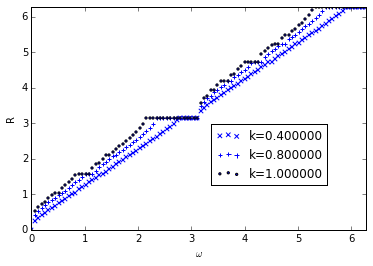

In [271]:
for k, marker, result in zip(ks, markers, results):
    scatter(*result.T, marker=marker, label="k=%f" % k)
gca().set_xlim([0, 2 * pi])
gca().set_ylim([0, 2*pi])
gca().set_xlabel("$\omega$")
gca().set_ylabel("R")
legend(bbox_to_anchor=(0.9, 0.5))

savefig("./pics/h6-4-1.pdf")

# 结果重复部分

## 计算 Logistic 映射的李指数

一维映射的李指数更加好算，只需在每一步映射上求出该点映射的导数值，并将这些导数值相乘求对数并除以映射的次数即可。

In [274]:
series = []
for r in np.linspace(2.5, 4, 500):
    logistic = Maps.LogisticMap(r, 0.51)
    series.append([r, logistic.lyapunovExponent()])
series = np.asarray(series)

In [275]:
xs = np.linspace(2.5, 4, 100)
ys = np.zeros(len(xs))

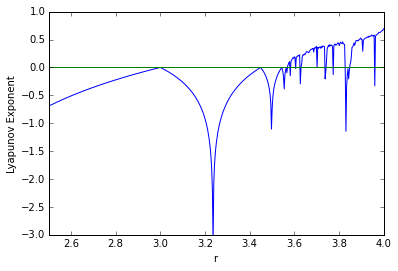

In [278]:
plot(*series.T)
plot(xs, ys)
gca().set_xlim([2.5, 4])
gca().set_ylim([-3, 1.0])
gca().set_xlabel("r")
gca().set_ylabel("Lyapunov Exponent")

savefig("./pics/rlogistic1.pdf")

# 计算 Logistic 映射吸引子的密度

依旧是画 Logistic 映射的吸引子，只是这里要计算对应 r 位置上点的密度，numpy 提供的直方图统计函数可以很好地解决这个问题。

In [285]:
logistic = Maps.LogisticMap(3.8, 0.4)
series = logistic.boundedSeries(5000000)
a = np.histogram(series, bins=300)

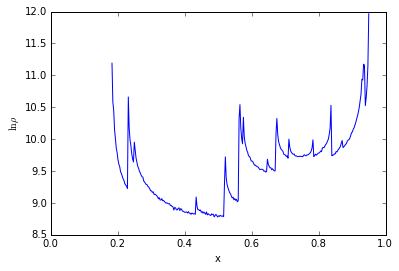

In [287]:
plot(a[1][1:], np.log(a[0]))

gca().set_xlim([0, 1])
gca().set_xlabel("x")
gca().set_ylabel("$\\ln{\\rho}$")

savefig("./pics/rlogistic2.pdf")

In [288]:
logistic = Maps.LogisticMap(4.0, 0.4)
series = logistic.boundedSeries(5000000)
a = np.histogram(series, bins=300)

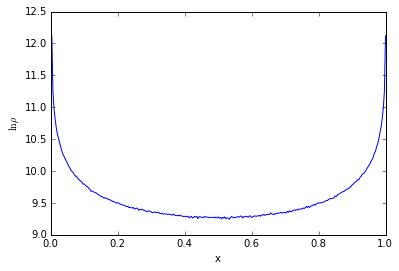

In [289]:
plot(a[1][1:], np.log(a[0]))

gca().set_xlim([0, 1])
gca().set_xlabel("x")
gca().set_ylabel("$\\ln{\\rho}$")

savefig("./pics/rlogistic3.pdf")

# 画吸引域

In [292]:
gm = Maps.GM(0.3, 1.32, 0.9, [0.2, 0.1])

In [297]:
def getBasin(steps, theta_lim, x_lim):
    result = []
    for theta_init in linspace(theta_lim[0], theta_lim[1], steps):
        for x_init in linspace(x_lim[0], x_lim[1], steps):
            theta0 = theta_init
            x0 = x_init
            theta = 0
            x = 0
            while True:
                theta, x = gm([theta0, x0])
                if abs(x - x0) < 0.00001:
                    break
                theta0 = theta
                x0 = x
            if x < 0:
                result.append([theta_init, x_init])
    return asarray(result)

In [310]:
result = getBasin(400, (0, 3), (-0.5, 0.5))

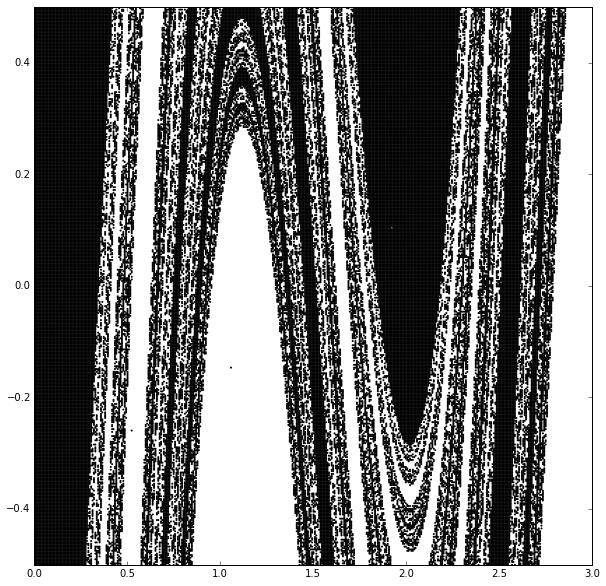

In [311]:
scatter(*result.T,s=4, edgecolor="none", c="black")
gcf().set_size_inches([10, 10])
gca().set_xlim([0, 3])
gca().set_ylim([-0.5, 0.5])

savefig("./pics/basin1.png")

In [307]:
result = getBasin(400, (1.92200, 1.92201), (-0.5, -0.49999))

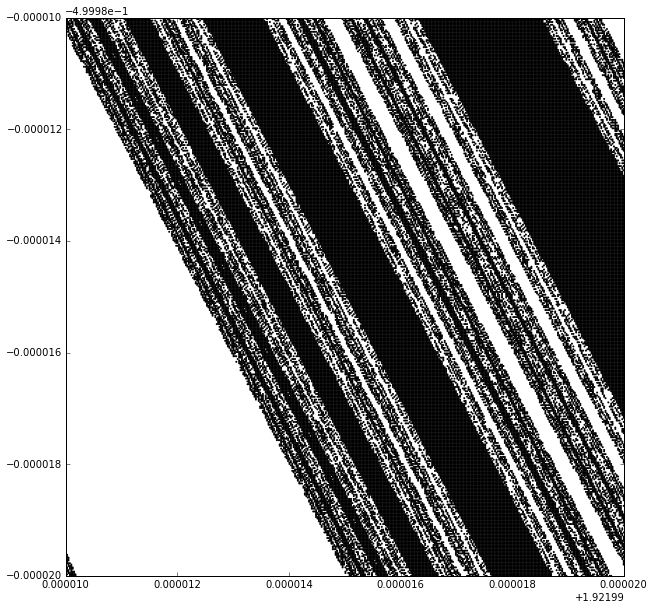

In [309]:
scatter(*result.T,s=4, edgecolor="none", c="black")
gcf().set_size_inches([10, 10])
gca().set_xlim([1.92200, 1.92201])
gca().set_ylim([-0.5, -0.49999])

savefig("./pics/basin2.png")

# 画出 Henon Map 的稳定和不稳定流形

In [77]:
def isStable(the_map, steps, lim):
    for i in range(steps):
        if any(map(lambda x: abs(x) > lim, the_map.next())):
            return False
    return True

In [78]:
def grid(xs, ys, the_map_class, steps, lim):
    result = []
    for x in xs:
        #print x
        for y in ys:
            if isStable(the_map_class(1.4, 0.3, [x, y]), steps, lim):
                result.append([x, y])
    return asarray(result)

In [80]:
unstable = grid(linspace(-3, 3, 1000), linspace(-3, 3, 1000),  Maps.ReversedHenonMap, 4, 3)

(-3, 3)

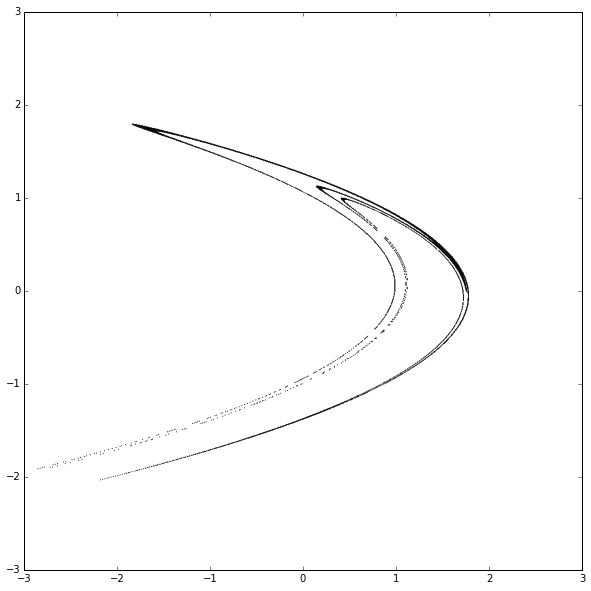

In [81]:
scatter(*unstable.T, s=1, c='black', edgecolor="none")
gcf().set_size_inches([10, 10])
gca().set_xlim([-3, 3])
gca().set_ylim([-3, 3])

In [82]:
stable = grid(linspace(-3, 3, 1000), linspace(-3, 3, 1000), Maps.HenonMap, 10, 1.7)

(-3, 3)

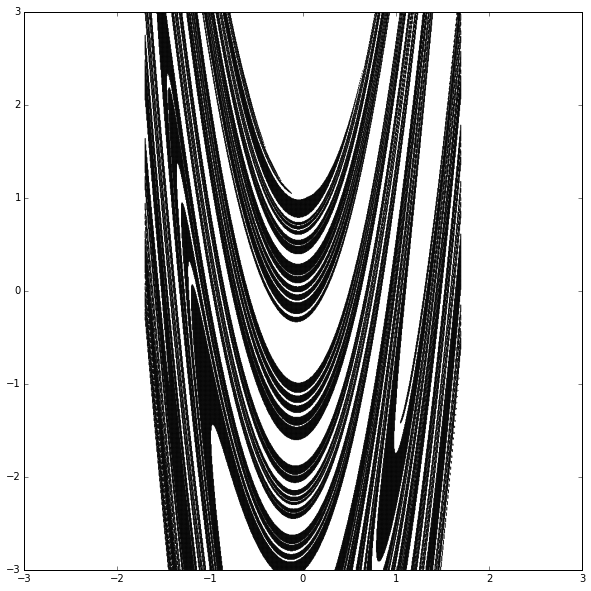

In [83]:
scatter(*stable.T, s=1, c='black', edgecolor="none")
gcf().set_size_inches([10, 10])
gca().set_xlim([-3, 3])
gca().set_ylim([-3, 3])

In [84]:
def grid_join(xs, ys):
    result = []
    for x in xs:
        #print x
        for y in ys:
            if isStable(Maps.HenonMap(1.4, 0.3, [x, y]), 10, 1.7) and isStable(Maps.ReversedHenonMap(1.4, 0.3, [x, y]), 4, 3):
                result.append([x, y])
    return asarray(result)

In [87]:
join = grid_join(linspace(-3, 3, 1000), linspace(-3, 3, 1000))

(-3, 3)

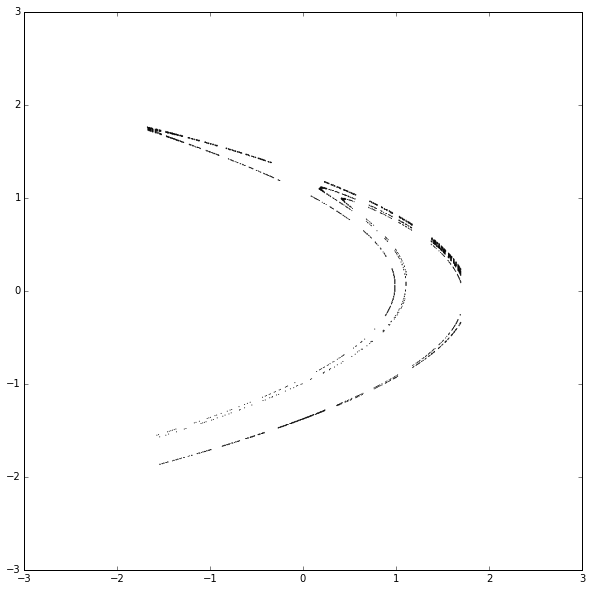

In [88]:
scatter(*join.T, s=1, c='black', edgecolor="none")
gcf().set_size_inches([10, 10])
gca().set_xlim([-3, 3])
gca().set_ylim([-3, 3])

In [89]:
join_zoomin = grid_join(linspace(0.1, 0.7, 400), linspace(0.7, 1.3, 400))

(0.7, 1.3)

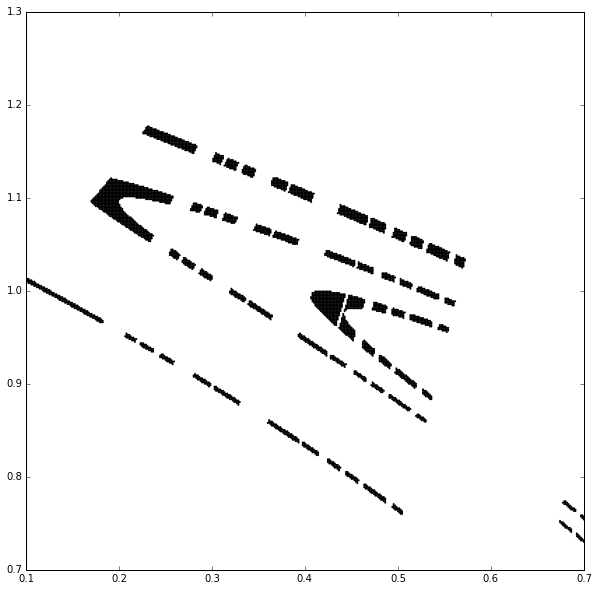

In [90]:
scatter(*join_zoomin.T, s=4, c='black', edgecolor="none")
gcf().set_size_inches([10, 10])
gca().set_xlim([0.1, 0.7])
gca().set_ylim([0.7, 1.3])

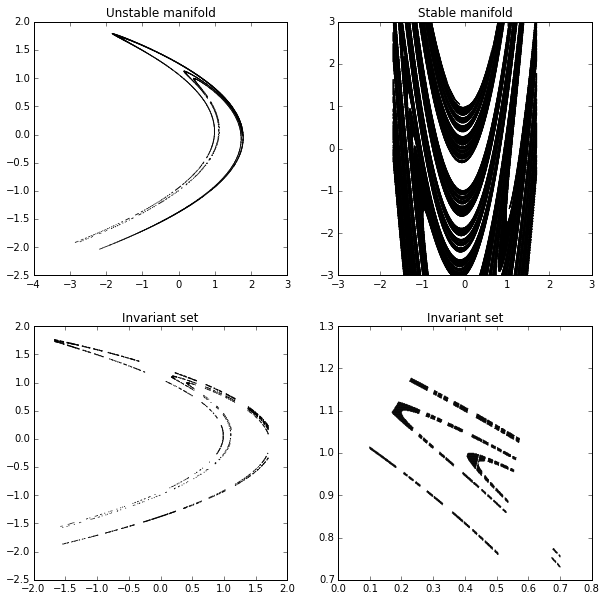

In [102]:
gcf().set_size_inches([10, 10])

ax1 = subplot(221)
ax1.scatter(*unstable.T, s=1, c='black', edgecolor="none")
ax1.set_title("Unstable manifold")

ax2 = subplot(222)
ax2.scatter(*stable.T, s=1, c='black', edgecolor="none")
ax2.set_xlim([-3, 3])
ax2.set_ylim([-3, 3])
ax2.set_title("Stable manifold")

ax3 = subplot(223)
ax3.scatter(*join.T, s=1, c='black', edgecolor="none")
ax3.set_title("Invariant set")

ax4 = subplot(224)
ax4.scatter(*join_zoomin.T, s=1, c='black', edgecolor="none")
ax4.set_title("Invariant set")

savefig("./pics/manifold.png")